# Gradient Descent on a Surface


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
print (mpl.__version__)
from sklearn.datasets import load_boston


3.0.0


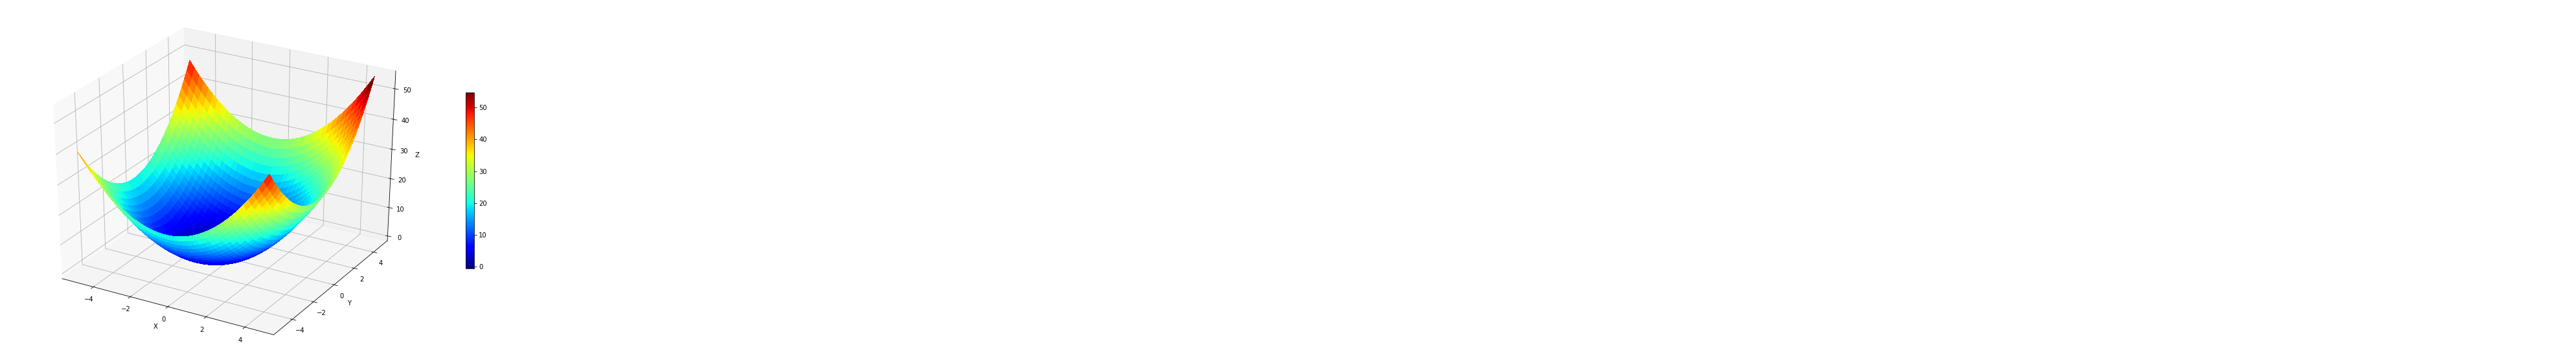

In [2]:
def plot_cost_surface(alpha=1):
    plt.rcParams['figure.figsize'] = [15, 10]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax = fig.gca(projection='3d')

    # Make data
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = X**2 + X+Y + Y**2

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False, alpha=alpha)

    # Add a color bar which maps values to colors
    m = cm.ScalarMappable(cmap=cm.jet)
    m.set_array(Z)
    plt.colorbar(m,shrink=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    return ax

plot_cost_surface()
plt.show()

In [ ]:
def cost(x, y):
    #Exercise 1
    pass

def update_x(x, eta):
    #Exercise 1
    pass

def update_y(y, eta):
    #Exercise 1
    pass

# maximum number of iterations
MAX_ITER=10
# Initial x, y values
x = -3
y = 4
# Learning rate
eta = 0.05

cost_values = [cost(x,y),]
x_values = []
y_values = []
z_values = []

ax = plot_cost_surface(alpha=0.3)

for i in range(MAX_ITER):
    x = update_x(x, eta)
    y = update_y(y, eta)
    z = cost(x,y)

    cost_values.append(z)
    x_values.append(x)
    y_values.append(y)
    z_values.append(z)

ax.scatter3D(x_values,y_values,z_values, c='black', marker='^', alpha=1)    
plt.show()

plt.rcParams['figure.figsize'] = [5, 3]
plt.plot(cost_values)
plt.show()

# Stochastic Gradient Descent using observations

In [ ]:
boston = load_boston()
X, Y = boston.data, boston.target
plt.hist(Y, 50)
plt.xlabel('Median value (in $1000)')

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:350], Y[:350]
test_data, test_labels = X[350:], Y[350:]

In [ ]:
# eta is the learning rate; smaller values will tend to give slower but more precise convergence.
# num_iters is the number of iterations to run.
def gradient_descent(train_data, target_data, eta, num_iters):
    # Add a 1 to each feature vector so we learn an intercept.
    X = np.c_[np.ones(train_data.shape[0]), train_data]
    
    # m = number of samples, k = number of features
    m, k = X.shape
    
    # Initially, set all the parameters to 1.
    theta = np.ones(k)
    
    # Keep track of costs after each step.
    costs = []
    for iter in range(0, num_iters):
        # Get the current predictions for the training examples given the current estimate of theta.
        hypothesis = np.dot(X, theta)
        
        # The loss is the difference between the predictions and the actual target values.
        loss = hypothesis - target_data
        
        # In standard linear regression, we want to minimize the sum of squared losses.
        cost = np.sum(loss ** 2) / (2 * m)
        costs.append(cost)
        
        # Compute the gradient.
        gradient = np.dot(X.T, loss) / m

        # Update theta, scaling the gradient by the learning rate.
        theta = theta - eta * gradient
        
    return theta, costs

# Run gradient descent and plot the cost vs iterations.
theta, costs = gradient_descent(train_data[:,0:1], train_labels, .01, 500)
plt.plot(costs)
plt.xlabel('Iteration'), plt.ylabel('Cost')
plt.show()
print(theta)

In [ ]:
# eta is the learning rate; smaller values will tend to give slower but more precise convergence.
# num_iters is the number of iterations to run.
def stochastic_gradient_descent(train_data, target_data, eta, num_iters):
    # Add a 1 to each feature vector so we learn an intercept.
    X = np.c_[np.ones(train_data.shape[0]), train_data]
    
    # m = number of samples, k = number of features
    m, k = X.shape
    
    # Initially, set all the parameters to 1.
    theta = np.ones(k)
    
    # Keep track of costs after each step.
    costs = []
    
    for iter in range(0, num_iters):
        # Get the current predictions for the training examples given the current estimate of theta.

        # Exercise 2 modify the iteration to perform stochastic gradient descent
        
        hypothesis = np.dot(X[random_sample_index,:], theta)
        
        # The loss is the difference between the predictions and the actual target values.
        loss = hypothesis - target_data
        
        # In standard linear regression, we want to minimize the sum of squared losses.
        cost = np.sum(loss ** 2) / (2 * m)
        costs.append(cost)
        
        # Compute the gradient.
        gradient = np.dot(X.T, loss) / m

        # Update theta, scaling the gradient by the learning rate.
        theta = theta - eta * gradient
        
    return theta, costs

# Run gradient descent and plot the cost vs iterations.
theta, costs = stochastic_gradient_descent(train_data[:,0:1], train_labels, .002, 1000)
plt.plot(costs)
plt.xlabel('Iteration'), plt.ylabel('Cost')
plt.show()
print(theta)